In [7]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from tensorflow.keras.datasets import mnist

In [8]:
df_test = pd.read_csv('./sign_mnist_test.csv')
df_train = pd.read_csv('./sign_mnist_train.csv')

In [9]:
#separate labels (letter classes) from training data set
#drop label from rest of pixels
labels_train = df_train['label']
df_train = df_train.drop('label',axis = 1)

In [10]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [11]:
# #separate labels (letter classes) from test data set
#drop label from rest of pixels
labels_test = df_test['label']
df_test = df_test.drop('label',axis = 1)

In [12]:
#convert pandas to numpy arrays
np_test =df_test.to_numpy()
np_train = df_train.to_numpy()
labels_train = labels_train.to_numpy()
labels_test = labels_test.to_numpy()

In [13]:
# This loads in the dataset. Thankfully, TensorFlow already has methods to load this dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

#define target values
y_train = labels_train
y_test = labels_test

# Normalize input values
x_train = np_train/255. #0-1
x_test = np_test/255.

# Generate 32x32 image set for use in LeNet
cnn_x_train = x_train.reshape(-1,28,28,1) # don't know what this 1 does
cnn_x_test = x_test.reshape(-1,28,28,1)
# cnn_x_train = np.pad(x_train, ((0,0),(2,2),(2,2))).reshape((-1, 32, 32, 1))
# cnn_x_test = np.pad(x_test, ((0,0),(2,2),(2,2))).reshape((-1, 32, 32, 1))

# Resize images for use in MLP
mlp_x_train = x_train.reshape((x_train.shape[0], 784))
mlp_x_test = x_test.reshape((x_test.shape[0], 784))

In [14]:
mlp_x_train.shape

(27455, 784)

In [15]:
# Implements the network using TensorFlow.Keras
def MLPNetwork(inputDim):
    # input layer (note that batches are already taken care of for you)
    x = keras.Input(shape=(inputDim,))
    
    # subsequent dense layers
    a1 = keras.layers.Dense(512, activation='relu')(x)
    a2 = keras.layers.Dense(512, activation='relu')(a1)
    
    # classification dense layer
    logits = keras.layers.Dense(25, activation='softmax')(a2)
    
    # Creates the model given the above structure
    model = keras.Model(inputs=x, outputs=logits)
    return model

MLPmod = MLPNetwork(784)
MLPmod.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 25)                12825     
Total params: 677,401
Trainable params: 677,401
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Sets up optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)
MLPmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# The callback forces the network to train until it reaches 100% accuracy
hist = MLPmod.fit(mlp_x_train, y_train, epochs=10, shuffle=True)

Train on 27455 samples
Epoch 1/10
27455/27455 [==============================] - 3s 94us/sample - loss: 1.5433 - acc: 0.5062
Epoch 2/10
27455/27455 [==============================] - 2s 91us/sample - loss: 0.5785 - acc: 0.8091
Epoch 3/10
27455/27455 [==============================] - 2s 88us/sample - loss: 0.2695 - acc: 0.9137
Epoch 4/10
27455/27455 [==============================] - 2s 84us/sample - loss: 0.1479 - acc: 0.9533
Epoch 5/10
27455/27455 [==============================] - 2s 82us/sample - loss: 0.1036 - acc: 0.9692
Epoch 6/10
27455/27455 [==============================] - 2s 84us/sample - loss: 0.0588 - acc: 0.9827
Epoch 7/10
27455/27455 [==============================] - 2s 85us/sample - loss: 0.0808 - acc: 0.9741
Epoch 8/10
27455/27455 [==============================] - 3s 94us/sample - loss: 0.0316 - acc: 0.9898
Epoch 9/10
27455/27455 [==============================] - 3s 92us/sample - loss: 0.0011 - acc: 1.0000
Epoch 10/10
27455/27455 [==============================] - 

In [17]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = MLPmod.evaluate(mlp_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 0s 52us/sample - loss: 1.0982 - acc: 0.6675
Test accuracy for this model is 0.6674568057060242


In [18]:
# Creates the model within this function
def LeNet():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  # more on this later
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) #access loss?
    
    return mod

# Declares the model and prepares it for training
LeNetMod = LeNet()
opt = keras.optimizers.Adam()
LeNetMod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) #balanced error rate(FP, recall certain classes)
LeNetMod.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               3084

In [48]:
# Trains the network using mini-batch learning
cnnHist = LeNetMod.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=128, epochs=30, shuffle=True, callbacks = [history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/30
20591/20591 [==============================] - 1s 64us/sample - loss: 0.0581 - acc: 0.9801 - val_loss: 0.0681 - val_acc: 0.9768
Epoch 2/30
20591/20591 [==============================] - 1s 60us/sample - loss: 0.0149 - acc: 0.9962 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 3/30
20591/20591 [==============================] - 1s 60us/sample - loss: 9.6404e-04 - acc: 1.0000 - val_loss: 7.6461e-04 - val_acc: 1.0000
Epoch 4/30
20591/20591 [==============================] - 1s 58us/sample - loss: 6.7799e-04 - acc: 1.0000 - val_loss: 5.8458e-04 - val_acc: 1.0000
Epoch 5/30
20591/20591 [==============================] - 1s 65us/sample - loss: 5.5634e-04 - acc: 1.0000 - val_loss: 4.8461e-04 - val_acc: 1.0000
Epoch 6/30
20591/20591 [==============================] - 1s 59us/sample - loss: 4.7561e-04 - acc: 1.0000 - val_loss: 4.2146e-04 - val_acc: 1.0000
Epoch 7/30
20591/20591 [==============================] - 1s 57us/sample - loss: 3.82

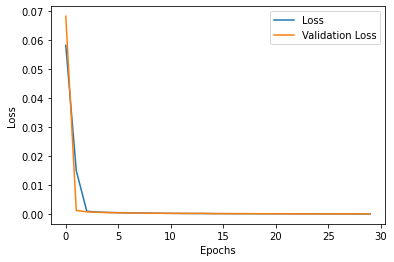

In [49]:
from tensorflow.keras.callbacks import History 
cnnHist.history# training loss
a = cnnHist.history['loss']
b = cnnHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [50]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = LeNetMod.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 0s 67us/sample - loss: 0.8598 - acc: 0.8603
Test accuracy for this model is 0.860289990901947


Text(0.5, 1.0, 'Number 19 classified as 23')

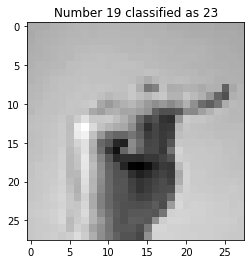

In [51]:
# Plot an incorrect value...
preds = LeNetMod.predict(cnn_x_test)
preds = np.argmax(preds, axis=1)
incorrectPreds = np.argwhere(preds != y_test)
randIncInd = np.random.choice(incorrectPreds.reshape(-1))
plt.imshow(cnn_x_test[randIncInd].reshape(28,28), cmap = 'gray')
plt.title("Number {} classified as {}".format(y_test[randIncInd], preds[randIncInd]))

Text(95.72222222222221, 0.5, 'Actual')

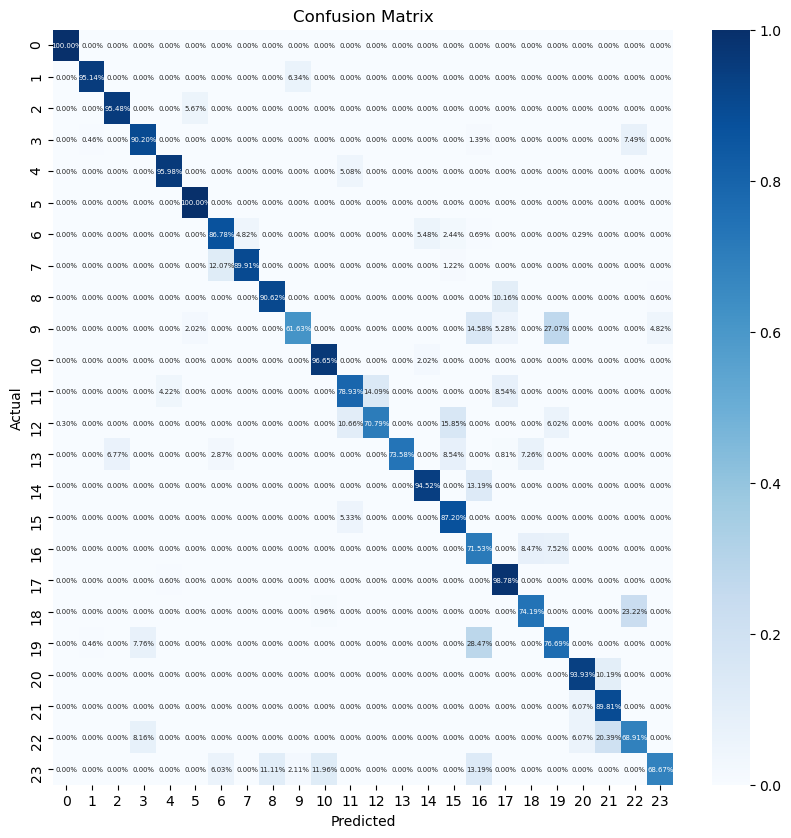

In [52]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

conMat = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,10), dpi=100)
heatmap(conMat/np.sum(conMat,axis=1), annot=True, annot_kws={"size": 5}, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Improvements

- add layers/architecture (available layers in tensorflow) dropout could be helpful
- dropout used in FNN, fully connected to delete certain weights (helps to generalize better)
- add penalty to certain classes e.g 16 is 42% incorrect, give greater weight to certain class
- data augmentation (rotate image, resizing)